# Linear Regression

## Index

1. [Imports and EDA](#Imports-and-EDA)
2. [Minimal Preprocessing](#Minimal-Preprocessing)
3. [Univariate Linear Regression](#Univariate-Linear-Regression)
4. [Multivariate Linear Regression](#Multivariate-Linear-Regression)
5. [Behavior of Numpy Arrays](#Behavior-of-Numpy-Arrays)

## Imports and EDA

Remember to start by running

```shell
uv sync
````

in the directory of the repo after cloning.

In [22]:
# Load the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from TA2_linreg import LinearRegressionModel
import time

np.random.seed(168)

In [23]:
# Load the data (House Prices dataset from Kaggle)

df = pd.read_csv("../data/house_prices/house_prices_train.csv")

In [24]:
# Take a peek at the data (Target Variable is SalePrice, self-descriptive)

df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [25]:
# Super quick EDA by printing the correlation matrix of numeric features

df_numeric = df.select_dtypes(include=[np.number]).copy()

corr = df_numeric.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).format("{:.4f}")

# # Alternative printing if you prefer an image formatting:
# plt.figure(figsize=(25, 25))
# sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
# plt.title("Correlation Matrix of Numeric Features")
# plt.show()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.0000,0.0112,-0.0106,-0.0332,-0.0284,0.0126,-0.0127,-0.0220,-0.0503,-0.0050,-0.0060,-0.0079,-0.0154,0.0105,0.0056,-0.0442,0.0083,0.0023,-0.0202,0.0056,0.0068,0.0377,0.0030,0.0272,-0.0198,0.0001,0.0166,0.0176,-0.0296,-0.0005,0.0029,-0.0466,0.0013,0.0570,-0.0062,0.0212,0.0007,-0.0219
MSSubClass,0.0112,1.0000,-0.3863,-0.1398,0.0326,-0.0593,0.0279,0.0406,0.0229,-0.0698,-0.0656,-0.1408,-0.2385,-0.2518,0.3079,0.0465,0.0749,0.0035,-0.0023,0.1316,0.1774,-0.0234,0.2817,0.0404,-0.0456,0.0851,-0.0401,-0.0987,-0.0126,-0.0061,-0.0120,-0.0438,-0.0260,0.0083,-0.0077,-0.0136,-0.0214,-0.0843
LotFrontage,-0.0106,-0.3863,1.0000,0.4261,0.2516,-0.0592,0.1233,0.0889,0.1935,0.2336,0.0499,0.1326,0.3921,0.4572,0.0802,0.0385,0.4028,0.1009,-0.0072,0.1988,0.0535,0.2632,-0.0061,0.3521,0.2666,0.0702,0.2857,0.3450,0.0885,0.1520,0.0107,0.0700,0.0414,0.2062,0.0034,0.0112,0.0074,0.3518
LotArea,-0.0332,-0.1398,0.4261,1.0000,0.1058,-0.0056,0.0142,0.0138,0.1042,0.2141,0.1112,-0.0026,0.2608,0.2995,0.0510,0.0048,0.2631,0.1582,0.0480,0.1260,0.0143,0.1197,-0.0178,0.1900,0.2714,-0.0249,0.1549,0.1804,0.1717,0.0848,-0.0183,0.0204,0.0432,0.0777,0.0381,0.0012,-0.0143,0.2638
OverallQual,-0.0284,0.0326,0.2516,0.1058,1.0000,-0.0919,0.5723,0.5507,0.4119,0.2397,-0.0591,0.3082,0.5378,0.4762,0.2955,-0.0304,0.5930,0.1111,-0.0402,0.5506,0.2735,0.1017,-0.1839,0.4275,0.3968,0.5478,0.6007,0.5620,0.2389,0.3088,-0.1139,0.0304,0.0649,0.0652,-0.0314,0.0708,-0.0273,0.7910
OverallCond,0.0126,-0.0593,-0.0592,-0.0056,-0.0919,1.0000,-0.3760,0.0737,-0.1281,-0.0462,0.0402,-0.1368,-0.1711,-0.1442,0.0289,0.0255,-0.0797,-0.0549,0.1178,-0.1941,-0.0608,0.0130,-0.0870,-0.0576,-0.0238,-0.3243,-0.1858,-0.1515,-0.0033,-0.0326,0.0704,0.0255,0.0548,-0.0020,0.0688,-0.0035,0.0439,-0.0779
YearBuilt,-0.0127,0.0279,0.1233,0.0142,0.5723,-0.3760,1.0000,0.5929,0.3157,0.2495,-0.0491,0.1490,0.3915,0.2820,0.0103,-0.1838,0.1990,0.1876,-0.0382,0.4683,0.2427,-0.0707,-0.1748,0.0956,0.1477,0.8257,0.5379,0.4790,0.2249,0.1887,-0.3873,0.0314,-0.0504,0.0049,-0.0344,0.0124,-0.0136,0.5229
YearRemodAdd,-0.0220,0.0406,0.0889,0.0138,0.5507,0.0737,0.5929,1.0000,0.1796,0.1285,-0.0678,0.1811,0.2911,0.2404,0.1400,-0.0624,0.2874,0.1195,-0.0123,0.4390,0.1833,-0.0406,-0.1496,0.1917,0.1126,0.6423,0.4206,0.3716,0.2057,0.2263,-0.1939,0.0453,-0.0387,0.0058,-0.0103,0.0215,0.0357,0.5071
MasVnrArea,-0.0503,0.0229,0.1935,0.1042,0.4119,-0.1281,0.3157,0.1796,1.0000,0.2647,-0.0723,0.1144,0.3639,0.3445,0.1746,-0.0691,0.3909,0.0853,0.0267,0.2768,0.2014,0.1028,-0.0376,0.2807,0.2491,0.2527,0.3642,0.3731,0.1597,0.1257,-0.1102,0.0188,0.0615,0.0117,-0.0298,-0.0060,-0.0082,0.4775
BsmtFinSF1,-0.0050,-0.0698,0.2336,0.2141,0.2397,-0.0462,0.2495,0.1285,0.2647,1.0000,-0.0501,-0.4953,0.5224,0.4459,-0.1371,-0.0645,0.2082,0.6492,0.0674,0.0585,0.0043,-0.1074,-0.0810,0.0443,0.2600,0.1535,0.2241,0.2970,0.2043,0.1118,-0.1023,0.0265,0.0620,0.1405,0.0036,-0.0157,0.0144,0.3864


## Minimal Preprocessing

In [26]:
start_time = time.time()

# We are going to start by focusing only on 1 variable, GrLivArea (Squared Feet)
df_sel = df[["GrLivArea", "SalePrice"]].copy()

# And we standardize them to fit the linear regression
df_sel = (df_sel - np.mean(df_sel, axis=0)) / np.std(df_sel, axis=0)

X = df_sel[["GrLivArea"]]
y = df_sel["SalePrice"]

In [27]:
# TRAIN TEST SPLIT

# Shuffle the data so we don't have ordering artifacts
df_shuffled = df.sample(frac=1, random_state=168).reset_index(drop=True)
display(df)
display(df_shuffled)

# Split the data until the 80% mark (80 train, 20 test)
print(len(df)*0.8) # 1168

df_train, df_test = df_shuffled.iloc[:1168, :].copy(), df_shuffled.iloc[1168:, :].copy()

print(len(df_train), len(df_test)) # 1168 292

display(df_train.head(), df_test.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,575,80,RL,70.0,10500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,12,2007,WD,Normal,139000
1,700,120,FV,59.0,4282,Pave,Pave,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,196000
2,1244,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000
3,566,70,RL,66.0,6858,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,128000
4,520,70,RL,53.0,10918,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2009,WD,Normal,234000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,272,20,RL,73.0,39104,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,241500
1456,992,70,RM,121.0,17671,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2009,WD,Normal,168000
1457,302,60,RL,66.0,16226,Pave,NaN,IR3,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,267000
1458,1338,30,RM,153.0,4118,Pave,Grvl,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2006,WD,Normal,52500


1168.0
1168 292


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,575,80,RL,70.0,10500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,12,2007,WD,Normal,139000
1,700,120,FV,59.0,4282,Pave,Pave,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,196000
2,1244,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000
3,566,70,RL,66.0,6858,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,128000
4,520,70,RL,53.0,10918,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2009,WD,Normal,234000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1168,1283,20,RL,61.0,8800,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,150500
1169,561,20,RL,NaN,11341,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,121500
1170,482,20,RL,72.0,11846,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,374000
1171,29,20,RL,47.0,16321,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,207500
1172,789,20,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,107900


## Univariate Linear Regression

In [28]:
# We are going to start by focusing only on 1 variable, GrLivArea (Squared Feet)

X_train, X_test = df_train[["GrLivArea", ]].copy(), df_test[["GrLivArea"]].copy()
y_train, y_test = df_train["SalePrice"].copy(), df_test["SalePrice"].copy()

print(X_train.shape, X_test.shape) # (1168, 1) (292, 1)
print(X_train, X_test)

(1168, 1) (292, 1)
      GrLivArea
0          1109
1          1391
2          2076
3          1647
4          2080
...         ...
1163       1541
1164       1525
1165       1473
1166       1690
1167       2515

[1168 rows x 1 columns]       GrLivArea
1168       1040
1169       1392
1170       1792
1171       1600
1172        901
...         ...
1455       1363
1456       1742
1457       2452
1458        693
1459       1128

[292 rows x 1 columns]


In [29]:
linreg = LinearRegressionModel(
                learning_rate = 0.05,
                n_iterations = 10000,
                tol = 1e-6,
                verbose = True,
                standardize = True
            )

linreg.fit(X_train, y_train)

linreg.fit_closed_form_linreg(X_train, y_train)

linreg.fit_svd_linreg(X_train, y_train)

fit_params = linreg.get_params()
display(fit_params)

Iteration 1: loss (MSE) = 1.000e+00
Iteration 2: loss (MSE) = 9.049e-01
Iteration 3: loss (MSE) = 8.278e-01
Iteration 4: loss (MSE) = 7.654e-01
Iteration 5: loss (MSE) = 7.148e-01
Iteration 6: loss (MSE) = 6.738e-01
Iteration 7: loss (MSE) = 6.407e-01
Iteration 8: loss (MSE) = 6.138e-01
Iteration 9: loss (MSE) = 5.920e-01
Iteration 10: loss (MSE) = 5.744e-01
Iteration 11: loss (MSE) = 5.601e-01
Iteration 12: loss (MSE) = 5.485e-01
Iteration 13: loss (MSE) = 5.392e-01
Iteration 14: loss (MSE) = 5.316e-01
Iteration 15: loss (MSE) = 5.254e-01
Iteration 16: loss (MSE) = 5.205e-01
Iteration 17: loss (MSE) = 5.164e-01
Iteration 18: loss (MSE) = 5.132e-01
Iteration 19: loss (MSE) = 5.105e-01
Iteration 20: loss (MSE) = 5.084e-01
Iteration 21: loss (MSE) = 5.066e-01
Iteration 22: loss (MSE) = 5.052e-01
Iteration 23: loss (MSE) = 5.041e-01
Iteration 24: loss (MSE) = 5.032e-01
Iteration 25: loss (MSE) = 5.024e-01
Iteration 26: loss (MSE) = 5.018e-01
Iteration 27: loss (MSE) = 5.013e-01
Iteration 

{'beta_0': Array(18044.15768823, dtype=float64),
 'beta_1': Array(108.03859363, dtype=float64),
 'converged': 'Converged',
 'n_iter': 136,
 'final_loss': 0.499224242894264,
 'closed_form_params': {'beta_0': Array(18044.05985916, dtype=float64),
  'beta_1': Array(108.03865828, dtype=float64)},
 'svd_params': {'beta_0': Array(18044.05985916, dtype=float64),
  'beta_1': Array(108.03865828, dtype=float64)}}

In [30]:
print(f"Beta 0 using GD: {fit_params['beta_0']:,.2f}")
print(f"Beta 0 using closed-form: {fit_params['closed_form_params']['beta_0']:,.2f}")
print(f"Beta 0 using SVD: {fit_params['svd_params']['beta_0']:,.2f}")

print(f"\nBeta 1 using GD: {fit_params['beta_1']:,.2f}")
print(f"Beta 1 using closed-form: {fit_params['closed_form_params']['beta_1']:,.2f}")
print(f"Beta 1 using SVD: {fit_params['svd_params']['beta_1']:,.2f}")

Beta 0 using GD: 18,044.16
Beta 0 using closed-form: 18,044.06
Beta 0 using SVD: 18,044.06

Beta 1 using GD: 108.04
Beta 1 using closed-form: 108.04
Beta 1 using SVD: 108.04


## Multivariate Linear Regression

In [31]:
# And now we are going to try the multivariate case using both: 
# GrLivArea (Squared Feet) and OverallQual (Overall Quality)

# X_train, X_test = df_train[["GrLivArea", "OverallQual"]].copy(), df_test[["GrLivArea", "OverallQual"]].copy()
X_train, X_test = df_train[["GrLivArea", "OverallQual", "GarageCars", "FullBath"]].copy(), df_test[["GrLivArea", "OverallQual", "GarageCars", "FullBath"]].copy()
y_train, y_test = df_train["SalePrice"].copy(), df_test["SalePrice"].copy()

print(X_train.shape, X_test.shape) # (1168, 2) (292, 2)

(1168, 4) (292, 4)


In [32]:
# Take a look at how numpy arrays are managed

x_mean, x_std = np.mean(X_train, axis=0), np.std(X_train, axis=0)
y_mean, y_std = np.mean(y_train, axis=0), np.std(y_train, axis=0)

display(x_mean, x_std, y_mean, y_std)

GrLivArea      1513.238870
OverallQual       6.105308
GarageCars        1.777397
FullBath          1.561644
dtype: float64

GrLivArea      524.922291
OverallQual      1.374314
GarageCars       0.751781
FullBath         0.550188
dtype: float64

np.float64(181532.35702054793)

np.float64(80140.59257362322)

In [33]:
linreg = LinearRegressionModel(
                learning_rate = 0.05,
                n_iterations = 10000,
                tol = 1e-6,
                verbose = True,
                standardize = True
            )

linreg.fit(X_train, y_train)

linreg.fit_closed_form_linreg(X_train, y_train)

linreg.fit_svd_linreg(X_train, y_train)

fit_params = linreg.get_params()
display(fit_params)

Iteration 1: loss (MSE) = 1.000e+00
Iteration 2: loss (MSE) = 6.800e-01
Iteration 3: loss (MSE) = 5.065e-01
Iteration 4: loss (MSE) = 4.119e-01
Iteration 5: loss (MSE) = 3.598e-01
Iteration 6: loss (MSE) = 3.307e-01
Iteration 7: loss (MSE) = 3.139e-01
Iteration 8: loss (MSE) = 3.040e-01
Iteration 9: loss (MSE) = 2.977e-01
Iteration 10: loss (MSE) = 2.935e-01
Iteration 11: loss (MSE) = 2.905e-01
Iteration 12: loss (MSE) = 2.882e-01
Iteration 13: loss (MSE) = 2.863e-01
Iteration 14: loss (MSE) = 2.847e-01
Iteration 15: loss (MSE) = 2.833e-01
Iteration 16: loss (MSE) = 2.821e-01
Iteration 17: loss (MSE) = 2.810e-01
Iteration 18: loss (MSE) = 2.799e-01
Iteration 19: loss (MSE) = 2.790e-01
Iteration 20: loss (MSE) = 2.781e-01
Iteration 21: loss (MSE) = 2.773e-01
Iteration 22: loss (MSE) = 2.766e-01
Iteration 23: loss (MSE) = 2.759e-01
Iteration 24: loss (MSE) = 2.753e-01
Iteration 25: loss (MSE) = 2.748e-01
Iteration 26: loss (MSE) = 2.743e-01
Iteration 27: loss (MSE) = 2.738e-01
Iteration 

{'beta_0': Array(-98936.05047602, dtype=float64),
 'beta_1': Array(52.69664682, dtype=float64),
 'beta_2': Array(27097.21745759, dtype=float64),
 'beta_3': Array(21349.86490647, dtype=float64),
 'beta_4': Array(-1702.22081411, dtype=float64),
 'converged': 'Converged',
 'n_iter': 321,
 'final_loss': 0.2681483644438423,
 'closed_form_params': {'beta_0': Array(-98936.19499883, dtype=float64),
  'beta_1': Array(52.69663136, dtype=float64),
  'beta_2': Array(27097.28031199, dtype=float64),
  'beta_3': Array(21349.79361888, dtype=float64),
  'beta_4': Array(-1702.27787876, dtype=float64)},
 'svd_params': {'beta_0': Array(-98936.19394482, dtype=float64),
  'beta_1': Array(52.69663133, dtype=float64),
  'beta_2': Array(27097.2801511, dtype=float64),
  'beta_3': Array(21349.79366824, dtype=float64),
  'beta_4': Array(-1702.27792536, dtype=float64)}}

In [34]:
print(f"Beta 0 using GD: {fit_params['beta_0']:,.2f}")
print(f"Beta 0 using closed-form: {fit_params['closed_form_params']['beta_0']:,.2f}")
print(f"Beta 0 using SVD: {fit_params['svd_params']['beta_0']:,.2f}")

print(f"\nBeta 1 using GD: {fit_params['beta_1']:,.2f}")
print(f"Beta 1 using closed-form: {fit_params['closed_form_params']['beta_1']:,.2f}")
print(f"Beta 1 using SVD: {fit_params['svd_params']['beta_1']:,.2f}")

print(f"\nBeta 2 using GD: {fit_params['beta_2']:,.2f}")
print(f"Beta 2 using closed-form: {fit_params['closed_form_params']['beta_2']:,.2f}")
print(f"Beta 2 using SVD: {fit_params['svd_params']['beta_2']:,.2f}")

Beta 0 using GD: -98,936.05
Beta 0 using closed-form: -98,936.19
Beta 0 using SVD: -98,936.19

Beta 1 using GD: 52.70
Beta 1 using closed-form: 52.70
Beta 1 using SVD: 52.70

Beta 2 using GD: 27,097.22
Beta 2 using closed-form: 27,097.28
Beta 2 using SVD: 27,097.28


In [35]:
end_time = time.time()

print(f"Total execution time: {end_time - start_time:.4f} seconds")

Total execution time: 0.8622 seconds


## Behavior of Numpy Arrays

In [36]:
# Here you can explore the product of numpy arrays in more detail

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

print(a.shape, "\n")

print(a * b) # Numpy arrays are multiplied element-wise when done like this
print(a @ b) # This is the dot product of the two arrays
print(np.matmul(a, b)) # This is also the dot product
print(a.dot(b)) # This is yet another way to compute the dot product

"""
You can observe how in none of these options do we need to explicitly
transpose one of the arrays. Any array can be treated as a column vector
or a row vector depending on the context, and Numpy will handle the
necessary transpositions automatically.

And for matrices things look very similar:
"""
print("\n\n")

A = np.array([  [1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]])

B = np.array([  [9, 8, 7],
                [6, 5, 4],
                [3, 2, 1]])

print(A.shape, "\n")

print(A * B) # Element-wise multiplication
print(A @ B) # Matrix multiplication
print(np.matmul(A, B)) # Matrix multiplication
print(A.dot(B)) # Matrix multiplication

(3,) 

[ 4 10 18]
32
32
32



(3, 3) 

[[ 9 16 21]
 [24 25 24]
 [21 16  9]]
[[ 30  24  18]
 [ 84  69  54]
 [138 114  90]]
[[ 30  24  18]
 [ 84  69  54]
 [138 114  90]]
[[ 30  24  18]
 [ 84  69  54]
 [138 114  90]]


In [37]:
"""
Array reshaping is also very straightforward:
"""

test_y = np.array([1, 2, 3])
print(test_y.shape, "\n", test_y, "\n")

test_y_vertical = test_y.reshape(-1, 1) # -1 means equal to the necessary size, which in this case is 3, the length of the original array
test_y_horizontal = test_y.reshape(1, -1)
test_y_1d = test_y.reshape(-1)

print(test_y_vertical.shape, "\n", test_y_vertical, "\n")
print(test_y_horizontal.shape, "\n", test_y_horizontal, "\n")
print(test_y_1d.shape, "\n", test_y_1d, "\n")

(3,) 
 [1 2 3] 

(3, 1) 
 [[1]
 [2]
 [3]] 

(1, 3) 
 [[1 2 3]] 

(3,) 
 [1 2 3] 



## Computational Differentiation in Python

In [38]:
"""
SYMBOLIC DIFFERENTIATION WITH SYMPY
"""

import sympy as sp

def f(x):
    return x**2 + 5*x + 1

x_array = np.array([0, 1, 2, 3, 4, 5, 10])

# We can easily evaluate f(x) for an entire array of values:
print("f(x) at x_array \n", f(x_array))

f(x) at x_array 
 [  1   7  15  25  37  51 151]


In [39]:
# Sympy uses symbols to represent variables, for example:
display(sp.sqrt(2))

# Or also:
x, y = sp.symbols('x y')
f_symb = x**2 + 5*x + 1
display(f_symb)

sqrt(2)

x**2 + 5*x + 1

In [40]:
# And you can also operate with functions:
display(f_symb * 2*y)
display(sp.expand(f_symb * 2*y))
display(sp.factor(sp.expand(f_symb * 2*y)))

y*(2*x**2 + 10*x + 2)

2*x**2*y + 10*x*y + 2*y

2*y*(x**2 + 5*x + 1)

In [41]:
# We can evaluate f(x) for a specific value of x:
f_symb_2 = f_symb * 2*y
print(f_symb_2.evalf(subs={x: 2, y: 3}).round(), "\n")

# But we cannot use sympy to evaluate f(x) for an array of values:
try:
    print(f_symb(x_array))
except TypeError as e:
    print(f"TypeError: {e}")

90 

TypeError: 'Add' object is not callable


In [42]:
# And most importantly, we can compute derivatives symbolically:
f_prime = sp.diff(f_symb, x)
display(f_prime)

# But it has some limitations:
absolute_value_prime = sp.diff(abs(x), x)
display(absolute_value_prime)

2*x + 5

(re(x)*Derivative(re(x), x) + im(x)*Derivative(im(x), x))*sign(x)/x

In [43]:
def print_plot_function(array, diff_array, exactfunction):
    plt.figure(figsize=(10, 6))
    plt.plot(array, diff_array, marker='o', label='Numerical')
    plt.plot(array, exactfunction(array), label='Exact', linestyle='--')
    plt.title('Function Plot')
    # plt.xticks(array.round())
    plt.xlabel('x')
    # plt.yticks(np.arange(min(diff_array)-1, max(diff_array)+2, 1))
    plt.ylabel('Gradient')
    plt.grid(True)
    plt.legend()
    plt.show()

x**2 + 5*x + 1

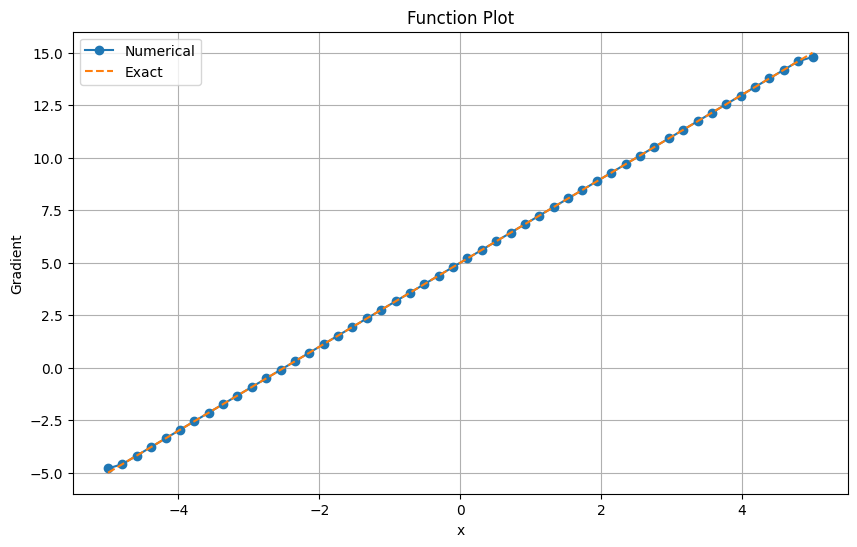

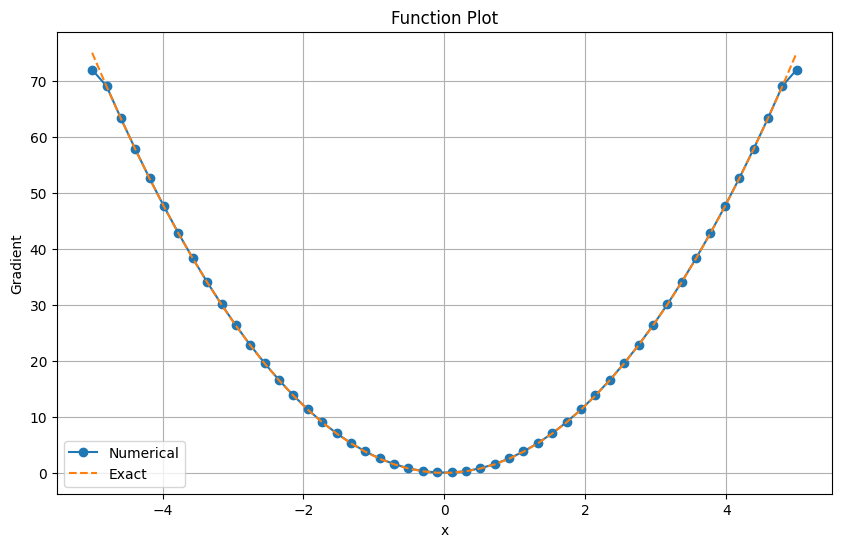

In [44]:
"""
NUMERICAL DIFFERENTIATION WITH NUMPY
"""

# We can easily evaluate f(x) for an entire array of values:
# Remember that we defined f(x) as:
display(f_symb) # f_symb is the symbolic representation, but I display it for ease of understanding, instead, f(x) is a numpy function

# Our x_array now is:
x_array_2 = np.linspace(-5, 5, 50)

# And its derivative evaluated for x_array is:
def dfdx(x):
    return 2*x + 5

diff_f_x_array_2 = np.gradient(f(x_array_2), x_array_2)
print_plot_function(x_array_2, diff_f_x_array_2, dfdx)

def g(x):
    return x**3

def dgdx(x):
    return 3*x**2

diff_g_x_array_2 = np.gradient(g(x_array_2), x_array_2)
print_plot_function(x_array_2, diff_g_x_array_2, dgdx)

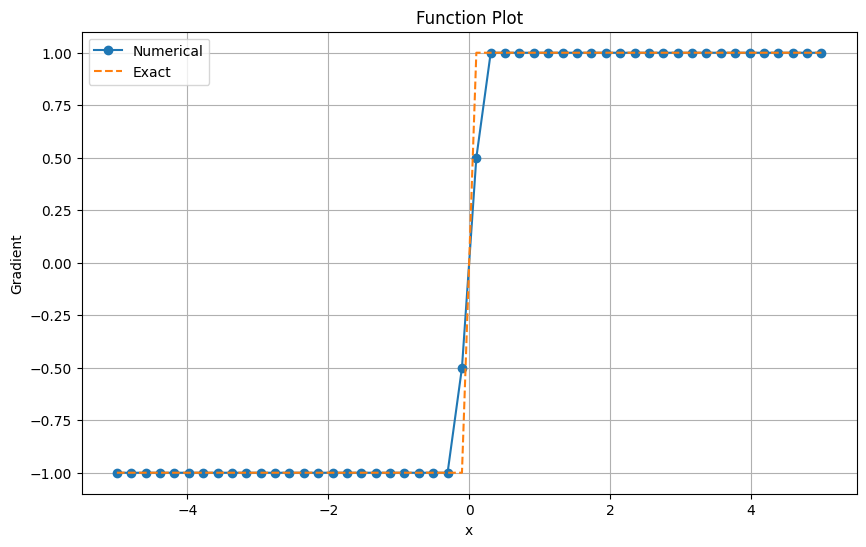

In [45]:
# But alas, it also has some limitations

def h(x):
    return abs(x)
def dhdx(x):
    return np.where(x > 0, 1, np.where(x < 0, -1, 0))
diff_h_x_array_2 = np.gradient(h(x_array_2), x_array_2)
print_plot_function(x_array_2, diff_h_x_array_2, dhdx)

In [46]:
"""
AUTODIFF USING JAX
"""
from jax import grad, vmap
import jax.numpy as jnp

x_array_jax = jnp.array(x_array.astype("float32")) # We convert the array of integers into float32
print(x_array_jax)

# Working with JAX arrays is very similar to working with numpy arrays, but some things need to be changed:
try:
    x_array_jax[2] = 12.0
except TypeError as e:
    print(f"TypeError: {e}")

# Here instead we need:
x_array_jax = x_array_jax.at[2].set(12.0)
print(x_array_jax)

[ 0.  1.  2.  3.  4.  5. 10.]
TypeError: JAX arrays are immutable and do not support in-place item assignment. Instead of x[idx] = y, use x = x.at[idx].set(y) or another .at[] method: https://docs.jax.dev/en/latest/_autosummary/jax.numpy.ndarray.at.html
[ 0.  1. 12.  3.  4.  5. 10.]


In [47]:
# The grad function computes the gradient of a function at a given point:
print(grad(f)(2.0))

# Remember that function f(x) was defined as:
display(f_symb)
# And its gradient is defined by:
display(f_prime)
# so 9.0 is indeed correct!

9.0


x**2 + 5*x + 1

2*x + 5

In [48]:
# Also, why is it important to use floats instead of integers?
try:
    grad(f)(3)
except TypeError as e:
    print(f"TypeError: {e}")

# But with a float:
print(grad(f)(3.0))

TypeError: grad requires real- or complex-valued inputs (input dtype that is a sub-dtype of np.inexact), but got int64. If you want to use Boolean- or integer-valued inputs, use vjp or set allow_int to True.
11.0


TypeError: Gradient only defined for scalar-output functions. Output had shape: (50,).


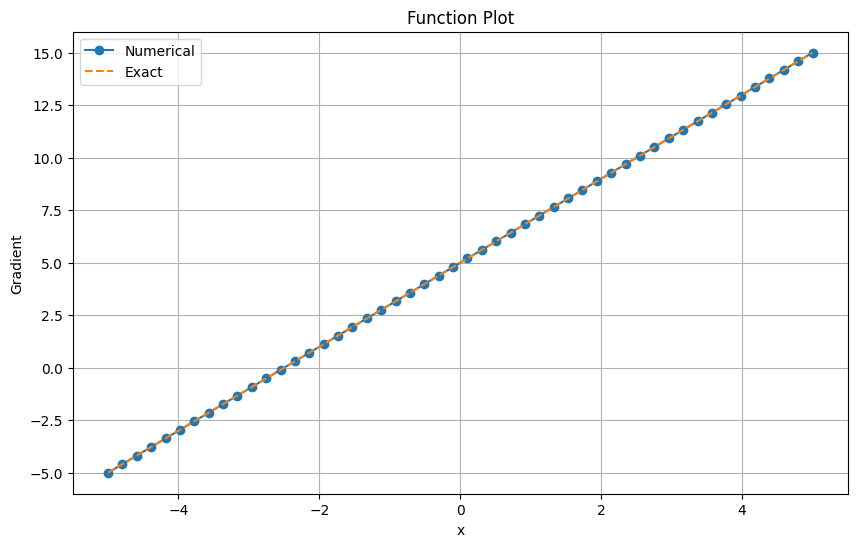

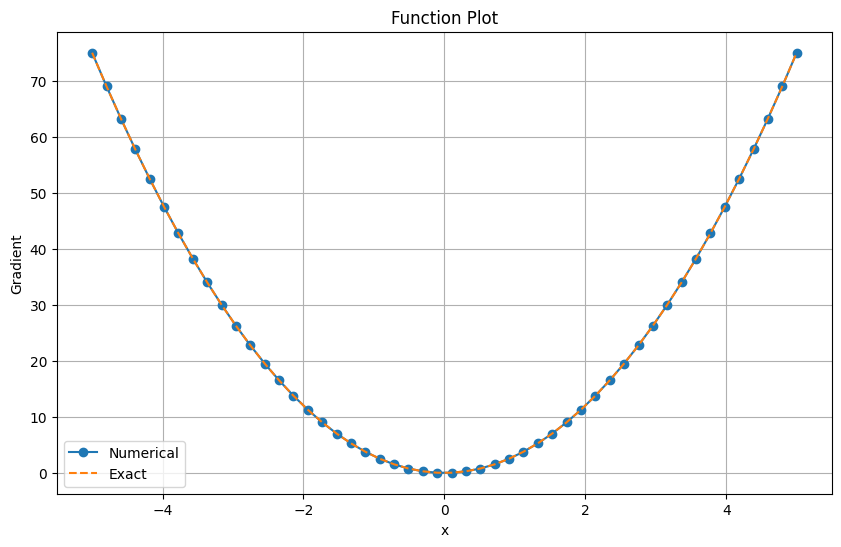

In [49]:
# Great now can we use it to evaluate arrays?
x_array_jax_2 = jnp.array(x_array_2.astype("float32"))

try:
    grad(f)(x_array_jax_2)
except TypeError as e:
    print(f"TypeError: {e}")

# We need to use vmap to vectorize the gradient function (we imported vmap above, when we imported grad as well)
dfdx_jax = vmap(grad(f))(x_array_jax_2)
print_plot_function(x_array_jax_2, dfdx_jax, dfdx)

# And also for g(x):
dgdx_jax = vmap(grad(g))(x_array_jax_2)
print_plot_function(x_array_jax_2, dgdx_jax, dgdx)

# Way more precise than numpy's gradient function!

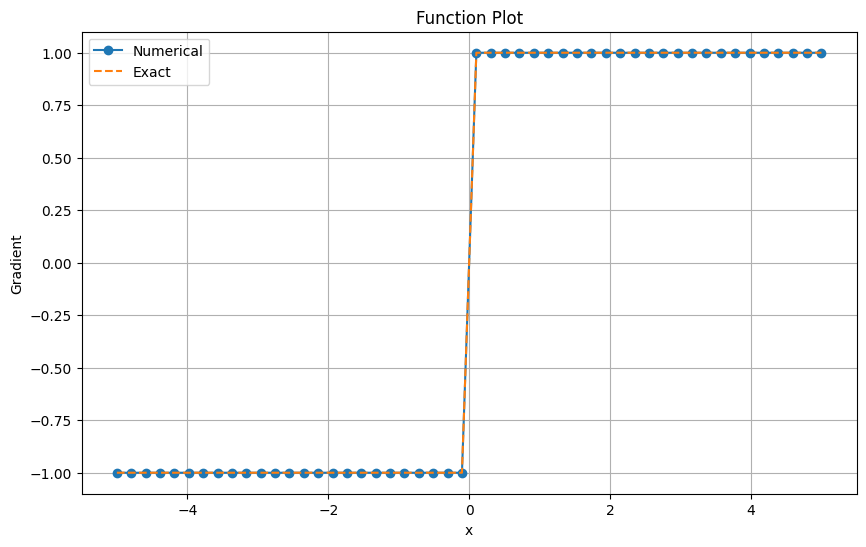

In [50]:
# And we can also compute the gradient of h(x) (the absolute value function):
dhdx_jax = vmap(grad(h))(x_array_jax_2)
print_plot_function(x_array_jax_2, dhdx_jax, dhdx)

# Now it is calculated precisely!